<a href="https://colab.research.google.com/github/Anushka-Verma-CODES/Colab_Notebook/blob/main/AI_MST_Proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd

local_file_path = 'cpu_temp_dataset.csv'

try:
    df = pd.read_csv(local_file_path)
    print(f"Successfully loaded '{local_file_path}' locally.")
    display(df.head())
except FileNotFoundError:
    print(f"Error: The file '{local_file_path}' was not found. Please ensure it is uploaded to your Colab session.")


Successfully loaded 'cpu_temp_dataset.csv' locally.


,server_id,timestamp,cpu_temp_c,cpu_temp_max_c,ambient_c,fan_rpm,power_w,current_a,voltage_v,source,cpu_util_pct,mem_util_pct,clock_mhz,workload_type
0,bmc,2023-04-25 13:23:00+00:00,40.000000,40.5,34.0,5288.250000,247.000000,20.583333,12.0,bmc,14.862058,3.728094,2267.579817,NaN
1,bmc,2023-04-25 13:24:00+00:00,38.583333,40.0,33.0,5287.750000,245.000000,20.416667,12.0,bmc,13.617702,38.469758,2227.892416,NaN
2,bmc,2023-04-25 13:25:00+00:00,37.500000,38.0,32.5,5288.583333,244.000000,20.333333,12.0,bmc,14.650687,0.260560,2262.639774,NaN
3,bmc,2023-04-25 13:26:00+00:00,36.875000,37.5,32.0,5287.500000,245.500000,20.458333,12.0,bmc,16.182615,15.163155,2349.689490,NaN
4,bmc,2023-04-25 13:27:00+00:00,36.333333,37.0,32.0,5287.583333,245.333333,20.444444,12.0,bmc,13.522517,17.270617,2216.207130,NaN


In [25]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19060 entries, 0 to 19059
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   server_id       19060 non-null  object 
 1   timestamp       19060 non-null  object 
 2   cpu_temp_c      19060 non-null  float64
 3   cpu_temp_max_c  19060 non-null  float64
 4   ambient_c       19060 non-null  float64
 5   fan_rpm         4765 non-null   float64
 6   power_w         19060 non-null  float64
 7   current_a       19060 non-null  float64
 8   voltage_v       19060 non-null  float64
 9   source          19060 non-null  object 
 10  cpu_util_pct    19060 non-null  float64
 11  mem_util_pct    19060 non-null  float64
 12  clock_mhz       19060 non-null  float64
 13  workload_type   12461 non-null  object 
dtypes: float64(10), object(4)
memory usage: 2.0+ MB
None


In [26]:
print("Null or NaN values in each column:")
display(df.isnull().sum())

Null or NaN values in each column:


,0
server_id,0
timestamp,0
cpu_temp_c,0
cpu_temp_max_c,0
ambient_c,0
fan_rpm,14295
power_w,0
current_a,0
voltage_v,0
source,0


In [27]:
# ---- Timestamp handling ----
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour
df['dayofweek'] = df['timestamp'].dt.dayofweek
df.drop(columns=['timestamp'], inplace=True)
display(df.head())

,server_id,cpu_temp_c,cpu_temp_max_c,ambient_c,fan_rpm,power_w,current_a,voltage_v,source,cpu_util_pct,mem_util_pct,clock_mhz,workload_type,hour,dayofweek
0,bmc,40.000000,40.5,34.0,5288.250000,247.000000,20.583333,12.0,bmc,14.862058,3.728094,2267.579817,NaN,13,1
1,bmc,38.583333,40.0,33.0,5287.750000,245.000000,20.416667,12.0,bmc,13.617702,38.469758,2227.892416,NaN,13,1
2,bmc,37.500000,38.0,32.5,5288.583333,244.000000,20.333333,12.0,bmc,14.650687,0.260560,2262.639774,NaN,13,1
3,bmc,36.875000,37.5,32.0,5287.500000,245.500000,20.458333,12.0,bmc,16.182615,15.163155,2349.689490,NaN,13,1
4,bmc,36.333333,37.0,32.0,5287.583333,245.333333,20.444444,12.0,bmc,13.522517,17.270617,2216.207130,NaN,13,1


In [28]:
# ---- Missing values ----
df['fan_rpm'] = df['fan_rpm'].fillna(df['fan_rpm'].median())
df['workload_type'] = df['workload_type'].fillna('unknown')
display(df.head())

,server_id,cpu_temp_c,cpu_temp_max_c,ambient_c,fan_rpm,power_w,current_a,voltage_v,source,cpu_util_pct,mem_util_pct,clock_mhz,workload_type,hour,dayofweek
0,bmc,40.000000,40.5,34.0,5288.250000,247.000000,20.583333,12.0,bmc,14.862058,3.728094,2267.579817,unknown,13,1
1,bmc,38.583333,40.0,33.0,5287.750000,245.000000,20.416667,12.0,bmc,13.617702,38.469758,2227.892416,unknown,13,1
2,bmc,37.500000,38.0,32.5,5288.583333,244.000000,20.333333,12.0,bmc,14.650687,0.260560,2262.639774,unknown,13,1
3,bmc,36.875000,37.5,32.0,5287.500000,245.500000,20.458333,12.0,bmc,16.182615,15.163155,2349.689490,unknown,13,1
4,bmc,36.333333,37.0,32.0,5287.583333,245.333333,20.444444,12.0,bmc,13.522517,17.270617,2216.207130,unknown,13,1


In [29]:
print("Null or NaN values in 'fan_rpm' and 'workload_type' columns after handling:")
display(df[['fan_rpm', 'workload_type']].isnull().sum())

Null or NaN values in 'fan_rpm' and 'workload_type' columns after handling:


,0
fan_rpm,0
workload_type,0


In [30]:
# ---- Drop leakage / useless columns ----
df.drop(columns=['cpu_temp_max_c', 'voltage_v'], inplace=True)

The feature cpu_temp_max_c is removed to prevent target leakage, as it is derived from the same thermal measurements as the prediction target.

The voltage feature was removed due to zero variance across all observations (voltage_v is constant (12V) for all rows), providing no predictive information.

## ***EDA plots***

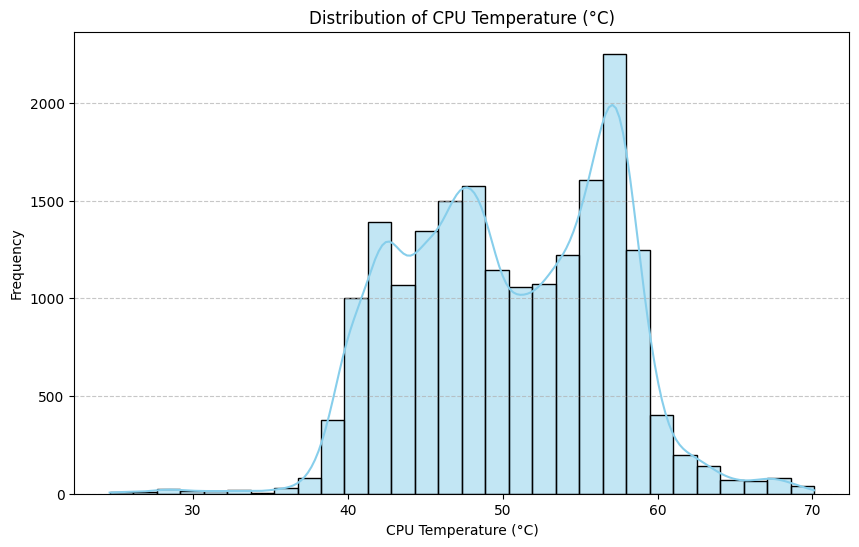

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['cpu_temp_c'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of CPU Temperature (°C)')
plt.xlabel('CPU Temperature (°C)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The CPU temperature distribution is approximately normal with moderate skewness, indicating stable operating conditions with occasional peak workloads.

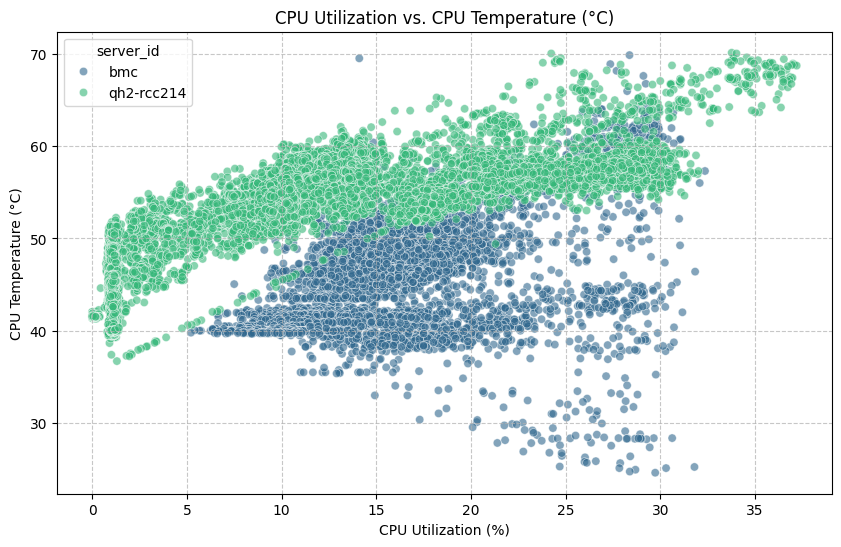

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cpu_util_pct', y='cpu_temp_c', data=df, alpha=0.6, hue='server_id', palette='viridis')
plt.title('CPU Utilization vs. CPU Temperature (°C)')
plt.xlabel('CPU Utilization (%)')
plt.ylabel('CPU Temperature (°C)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

CPU utilization shows a strong positive relationship with temperature, validating its importance as a primary predictive feature. It also suggest Use non-linear models

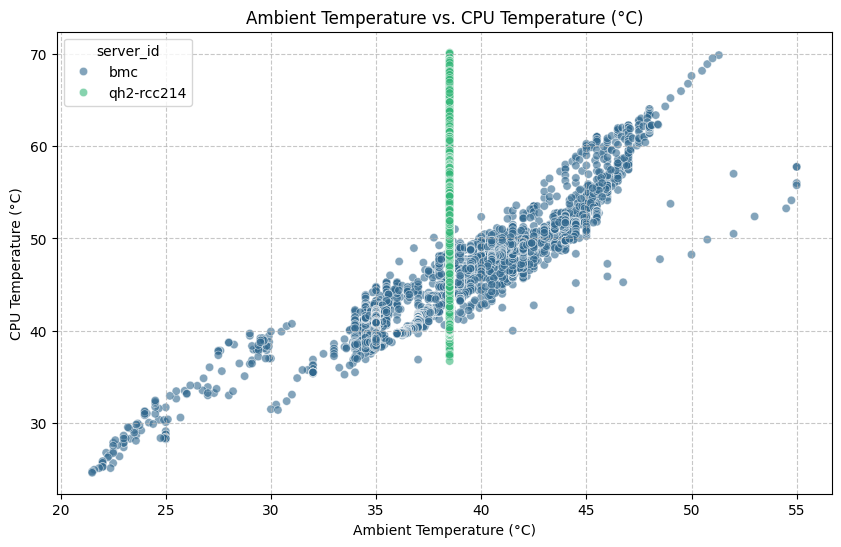

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ambient_c', y='cpu_temp_c', data=df, alpha=0.6, hue='server_id', palette='viridis')
plt.title('Ambient Temperature vs. CPU Temperature (°C)')
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('CPU Temperature (°C)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


Ambient temperature demonstrates a near-linear relationship with CPU temperature, emphasizing the impact of environmental conditions on server thermals.

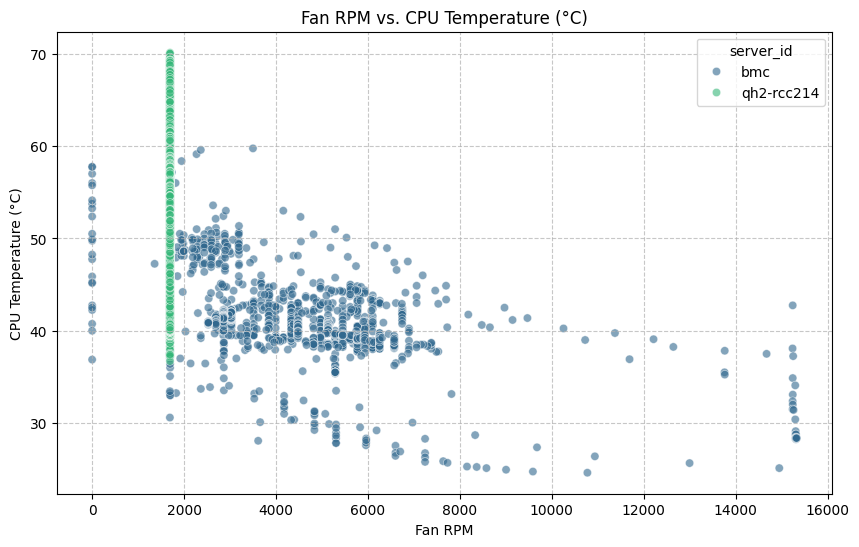

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='fan_rpm', y='cpu_temp_c', data=df, alpha=0.6, hue='server_id', palette='viridis')
plt.title('Fan RPM vs. CPU Temperature (°C)')
plt.xlabel('Fan RPM')
plt.ylabel('CPU Temperature (°C)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Fan speed exhibits an inverse relationship with CPU temperature, highlighting its role in active thermal regulation. It suggests that Non-linear & inverse → tree models handle this best

In [35]:
from sklearn.model_selection import train_test_split

X = df.drop('cpu_temp_c', axis=1)
y = df['cpu_temp_c']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dataset split into training and testing sets:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Dataset split into training and testing sets:
X_train shape: (15248, 12)
X_test shape: (3812, 12)
y_train shape: (15248,)
y_test shape: (3812,)


In [38]:
print("Unique values for 'server_id':")
display(df['server_id'].unique())

print("\nUnique values for 'source':")
display(df['source'].unique())

print("\nUnique values for 'workload_type':")
display(df['workload_type'].unique())

Unique values for 'server_id':


array(['bmc', 'qh2-rcc214'], dtype=object)


Unique values for 'source':


array(['bmc', 'dcc'], dtype=object)


Unique values for 'workload_type':


array(['unknown', '0.0_vms', '1.0_vms', '1.85_vms', '2.0_vms', '4.0_vms',
       '3.0_vms', '0.85_vms'], dtype=object)

In [41]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

numeric_cols = ['fan_rpm', 'cpu_util_pct']
categorical_cols = ['server_id', 'source', 'workload_type']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)
